# Data Mining Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
pd.set_option('mode.chained_assignment', None)

In [2]:
groceries = pd.read_csv('groceries/groceries - groceries.csv', delimiter=',')

with open('recipe-ingredients-dataset/train.json', 'r') as f:
    txt = f.read()
recipes = pd.DataFrame(json.loads(txt))

In [3]:
recipes

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


## Cleaning recipes dataset

In [4]:
def remove_stop_words(query,stopwords):
    querywords = query.split()
    results_word = [word.lower() for word in querywords if word.lower() not in stopwords]
    results = ' '.join(results_word)
    return results

In [5]:
import re

stopwords = 'bamboo shoots maple heavy wonton wrappers unflavored gelatin thai shiitake pecan pecans gochujang base frozen pastry puff sheets english crã¨me fraã®che chorizo sauherbs chipotle chile chipotles in adobo asafoetida active bok choy kalamata sprigs shortening andouille sauherbs cajun seasoning half spray powder noodles sliced cottage parmesan pip semi-finished other bottled tropical grape romaine confectioners cloves ground jalapeno black all-purpose kosher green large unsalted extra-virgin purple grated dried chopped \
fresh diced minced brown extract dry white yellow boneless skinless breasts breast flat freshly sea dried \
granulated crushed shredded whole halves peeled coarse warm yolks cold flakes whites cooking fat free less sodium \
sliced finely low light cracked spring lean cooked part-skim citrus roasted sliced flank unsweetened sweetened melted fine \
yellow dark smoked toasted crumbles plain evaporated baking firm red 1% low-fat \
reduced-fat italian greek style whole peeled shoulder plain unbleached dry baby and frozen\
button cremini pure reduced steamed nonfat & de medium extra prepared bow-tie'

stopwords = stopwords.split(' ')

In [6]:
ingredients_filtered = []

for i in recipes["ingredients"]:
    temp_l = []
    for j in i:
        temp_l.append(remove_stop_words(j,stopwords))
        
    ingredients_filtered.append(temp_l)
    
recipes["ingredients_filtered"] = ingredients_filtered

In [7]:
recipes

,id,cuisine,ingredients,ingredients_filtered
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, pepper, on..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, pepper, salt, tomatoes, pepper, thyme,..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, oil, chilies, ..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[pepper, shallots, cornflour, cayenne pepper, ..."
...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, , corn starch, s..."


In [8]:
#remove empty strings from ingredients_filtered
def remove_empty_strings(l):
    l = [i for i in l if i]
    return l

recipes["ingredients_filtered"] = recipes["ingredients_filtered"].apply(remove_empty_strings)

In [9]:
# Replacing lemma with token
import nltk
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

# Ritorna il giusto tag per la parola che analizza (se verbo lo tratta da verbo, se nome da nome, avverbio da avverbio)
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kekko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [10]:
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

ingredients_filtered_clean = []
for sentence in recipes['ingredients_filtered']:
    ingredients_filtered_clean.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

recipes["ingredients_filtered_clean"] = ingredients_filtered_clean

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kekko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, pepper, on...","[lettuce, olive, tomato, garlic, pepper, onion..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, pepper, salt, tomatoes, pepper, thyme,...","[flour, pepper, salt, tomato, pepper, thyme, e..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, oil, chilies, ...","[egg, pepper, salt, mayonaise, oil, chilies, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[pepper, shallots, cornflour, cayenne pepper, ...","[pepper, shallot, cornflour, cayenne pepper, o..."
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, egg, flour, whea..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, broccoli florets..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[egg, fruit, raisin, sourdough starter, flour,..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, corn starch, soy...","[chicken thigh, garlic, rice, corn starch, soy..."


# Ingredienti che appaiono piú di 100 volte|

In [12]:
#Check ingredients that appear at least 100 times
from collections import Counter

temp_l = recipes["ingredients_filtered_clean"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
ing = [(x,y) for x,y in ing_value_count if y>=100]
print(len(ing))
# ing

419


# Replace per macro ingredients

In [13]:
word_dict_recipes = {'onions':'onion',
            'olives':'olive',
            'almonds':'almond',
            'ribs':'rib',
            'thighs':'thigh',
            'potatoes':'potato',
            'mushrooms':'mushroom',
            'legs':'leg',
            'carrots':'carrot',
            'wings':'',
            'steaks':'steak',
            'bourbon whiskey':'whiskey',
             'yoghurt':'yogurt',
             'jack daniels':'whiskey',
             'olive oil':'oil',
             'vegetable oil':'oil',
             'chicken thigh':'chicken',
             'sherry vinegar':'vinegar',
             'sesame oil':'oil',
             'chili powder':'chili',
             'cayenne pepper':'pepper',
             'cheddar cheese':'cheese',
             'mozzarella':'cheese',
             'rice vinegar':'vinegar',
             'canola oil':'oil',
             'mozzarella cheese':'cheese',
             'basilico':'herbs',
             'cilantro leaves':'cilandro',
             'tomato paste':'tomato',
             'heavy cream':'cream',
             'wine vinegar':'vinegar',
             'chicken stock':'chicken',
             'leaf parsley':'parsley',
             'bay leaves':'bay',
             'buttermilk':'butter',
             'cumin seed':'cumin',
             'zucchini':'vegetables',
             'plum tomatoes':'tomato',
             'flour tortillas':'tortillas',
             'corn tortillas':'tortillas',
             'bay leaf':'bay',
             'basil leaves':'basil',
             'worcestershire sauce':'sauce',
             'curry powder':'curry',
             'hot sauce':'sauce',
             'peppercorn':'pepper',
             'cinnamon sticks':'cinnamon',
             'cream cheese':'cheese',
             'feta cheese':'cheese',
             'whipping cream':'cream',
             'peanut oil':'oil',
             'bread crumbs':'bread',
             'lemon zest':'lemon',
             'balsamic vinegar':'vinegar',
             'celery ribs':'ribs',
             'orange juice':'juice',
             'dijon mustard':'mustard',
             'sour cream':'cream',
             'ricotta cheese':'cheese',
             'ricotta':'cheese',
             'mustard seeds':'mustard',
             'powdered sugar':'sugar',
             'lime wedges':'lime',
             'sharp cheddar cheese':'cheese',
             'beef broth':'broth',
             'ginger root':'ginger',
             'sweet potatoes':'potato',
             'oyster sauce':'sauce',
             'beansprouts':'bean',
             'cornmeal':'flour',
             'vegetable broth':'broth',
             'cherry tomatoes':'tomato',
             'hoisin sauce':'sauce',
             'chicken thighs':'chicken',
             'coriander seeds':'coriander',
             'enchilada sauce':'sauce',
             'frozen peas':'peas',
             'long-grain rice':'rice',
             'hot water':'water',
             'monterey jack cheese':'cheese',
             'parmigiano reggiano cheese':'cheese',
             'fennel seeds':'fennel',
             'boiling water':'water',
             'condensed milk':'milk',
             'cider vinegar':'vinegar',
             'chicken thigh':'chicken',
             'spaghetti':'pasta',
             'corn meal':'flour',
             'basmati rice':'rice',
             'chile pepper':'pepper',
             'sweet onion':'onion',
             'steak':'meat',
             'tomatillo':'tomato',
             'sage':'herbs',
             'ghee':'butter',
             'hot pepper sauce':'sauce',
             'tortilla chips':'tortilla',
             'serrano chile':'pepper',
             'sriracha':'sauce',
             'long grain rice':'rice',
             'arborio rice':'rice',
             'kidney beans':'bean',
             'curry leaves':'curry',
             'curry paste':'curry',
             'taco seasoning':'sauce',
             'creole seasoning':'creole',
             'prosciutto':'ham',
             'garlic paste':'garlic',
             'corn kernels':'corn',
             'baguette':'bread',
             'pasta sauce':'sauce',
             'saffron threads':'herbs',
             'okra':'vegetables',
             'apple cider vinegar':'vinegar',
             'andouille sausage':'meat',
             'corn syrup':'syrup',
             'russet potatoes':'potato',
             'shaoxing wine':'wine',
             'refried beans':'beans',
             'mint leaves':'mint',
             'frozen spinach':'spinach',
             'chinese five-spice':'herbs',
             'linguine':'pasta',
             'cardamom pods':'herbs',
             'golden raisins':'vegetables',
             'hot pepper':'pepper',
             'monterey jack':'cheese',
             'marinara sauce':'sauce',
             'thyme leaves':'thyme',
             'cornflour': 'flour',
             'soy sauce':'sauce',
             'lemon juice':'juice',
             'chicken broth':'broth',
             'chilies':'chili',
             'lime juice':'juice',
             'bay':'herbs',
             'beans':'bean',
             'paprika':'herbs',
             'fish sauce':'sauce',
             'chees cheese':'cheese',
             'sesame seeds':'sesame',
             'salsa':'tomato',
             'garam masala':'herbs',
             'tomato sauce':'tomato',
             'chili peppers':'chili',
             'sharp cheese':'cheese',
             'sweet potato':'potato',
             'turkey':'meat',
             'sherry':'wine',
             'half half':'',
             'sake':'wine',
             'tomatos':'tomato',
             'chiles':'chili',
             'apple vinegar':'vinegar',
             'russet potato':'potato',
             'star anise':'herbs',
             'french bread':'bread',
             'lettuce leaves':'lettuce',
             'pork tenderloin':'pork',
             'roma tomatoes':'tomato',
             'lemon wedge':'lemon',
             'coconut oil':'oil',
             'lemon peel':'lemon',
             'rice wine':'wine',
             'shiitake mushroom':'mushroom',
             'yukon gold potato':'potato',
             'cilantro sprigs':'cilantro',
             'lasagna':'pasta',
             'bacon slices':'bacon',
             'cannellini beans':'bean',
             'fennel bulb':'fennel',
             'tabasco pepper sauce':'sauce',
             'vegetable stock':'broth',
             'pitted kalamata olives':'olive',
             'pinto beans':'bean',
             'black-eyed peas':'peas',
             'bread flour':'flour',
             'self rising flour':'flour',
             'stewed tomatoes':'tomato',
             'button mushroom':'mushroom',
             'broccoli florets':'vegetables',
             'bread crumb':'bread',
             'provolone cheese':'cheese',
             'semisweet chocolate':'chocolate',
             'vanilla beans':'bean',
             'iceberg lettuce':'lettuce',
             'ice water':'water',
             'miso':'herbs',
             'all purpose flour':'flour',
             'allspice':'herbs',
             'ancho pepper':'pepper',
             'anchovy fillets':'fish',
             'artichoke hearts':'artichoked',
             'asian sauce':'sauce',
             'barbecue sauce':'sauce',
             'beef stock':'beef',
             'bittersweet chocolate':'chocolate',
             'butternut squash':'butter',
             'cake flour':'flour',
             'canned broth':'broth',
             'cannellini bean':'bean',
             'caster sugar':'sugar',
             'catfish fillets':'fish',
             'cayenne':'pepper',
             'celery rib':'rib',
             'cheese, soften':'cheese',
             'chicken ':'chicken',
             'chicken leg':'chicken',
             'chicken pieces':'chicken',
             'chile':'chili',
             'chili oil':'oil',
             'chili paste':'chili',
             'chili pepper':'chili',
             'chili sauce':'sauce',
             'chillies':'chili',
             'chinese wine':'wine',
             'corn oil':'oil',
             'creamy peanut butter':'butter',
             'cream of tartar':'cream',
             'fettuccine':'pasta',
             'firmly packed sugar':'sugar',
             'fontina cheese':'cheese',
             'pastry puff sheets':'pasta',
             'garlic chili sauce':'sauce',
             'ginger paste':'ginger',
             'gingerroot':'ginger',
             'goat cheese':'cheese',
             'granny smith apples':'apple',
             'hard-boiled egg':'egg',
             'heavy cream':'cream',
             'herbs leaves':'herbs',
             'hominy':'corn',
             'ice cubes':'ice',
             'jack cheese':'cheese',
             'jasmine rice':'rice',
             'kernel corn, drain':'corn',
             'lime zest':'lime',
             'leaves':'herbs',
             'mexican cheese blend':'cheese',
             'mexican oregano':'herbs',
             'mushroom caps':'mushroom',
             'non-fat cream':'cream',
             'orange peel':'orange',
             'orange zest':'orange',
             'palm sugar':'sugar',
             'pancetta':'bacon',
             'panko breadcrumbs':'bread',
             'parsley leaves':'parsley',
             'peanut butter':'butter',
             'pecorino romano cheese':'cheese',
             'penne':'pasta',
             'penne pasta':'pasta',
             'pesto':'sauce',
             'pinto bean':'bean',
             'pitted olive':'olive',
             'pizza doughs':'pizza',
             'poblano chili':'chili',
             'poblano peppers':'pepper',
             'pork belly':'pork',
             'pork loin':'pork',
             'pork sauherbss':'pork',
             'queso fresco':'cheese',
             'raisins':'grape',
             'rice flour':'flour',
             'romano cheese':'cheese',
             'salad dressing':'salt',
             'salmon':'fish',
             'salmon fillets':'fish',
             'sauherbs':'herbs',
             'sauherbs casings':'herbs',
             'sauherbss':'herbs',
             'scallops':'meat',
             'seasoned bread':'bread',
             'serrano peppers':'pepper',
             'shrimp':'fish',
             'slivered almond':'almond',
             'snow peas':'peas',
             'soba':'soda',
             'spices':'herbs',
             'spinach leaves':'spinach',
             'sugar pea':'peas',
             'sun-dried tomatoes':'tomato',
             'sweet chili sauce':'sauce',
             'sweet herbs':'herbs',
             'swiss cheese':'cheese',
             'szechwan peppers':'pepper',
             'taco mix':'taco',
             'tarragon':'herbs',
             'tomato purã©e':'tomato',
             'tomato verde':'tomato',
             'tomatoes':'tomato',
             'tortillas':'tortilla',
             'vanilla bean':'bean',
             'vidalia onion':'onion',
             'water chestnuts':'chestnuts',
             'wheat flour':'flour',
             'whipped cream':'cream',
             'chickenpieces': 'chicken',
             'corn starch': 'starch',
             'cheese cheese': 'cheese',
             'rib': 'herbs',
             'clove': 'herbs',
             'mirin': 'wine',
             'ketchup': 'sauce',
             'parsley herbs': 'herbs',
             'lamb': 'meat',
             'radishes': 'vegetables',
             'tumeric': 'herbs',
             'bananas': 'fruits',
             'pasta pasta': 'pasta',
             'apples': 'fruits',
             'herbss': 'herbs',
             'spinach herbs': 'spinach',
             'grits': 'vegetables',
             'fettucine': 'pasta',
             'clam juice': 'juice',
             'cotija': 'cheese',
             'pimentos': 'herbs',
             'garlic sauce': 'sauce',
             'sweet sauce': 'sauce',
             'kaffir lime herbs': 'herbs',
             'marsala wine': 'wine',
             'lump crab meat': 'crab',
             'herbs casings': 'herbs',
             'mayonnaise': 'sauce',
             'pork chops': 'pork',
             'porcini mushroom': 'mushroom',
             'pears': 'fruits',
             'masa harina': 'flour',
             'rosemary': 'herbs',
             'mayonaise': 'sauce',
             'peaches': 'fruits',
             'fish fillets': 'fish',
             'garbanzo bean': 'chickpeas',
             'chickenleg': 'chicken',
             'greens': 'vegetables',
             'turnips': 'vegetables',
             'tomato juice': 'juice',
             'chuck': 'meat',
             'fennel': 'vegetables',
             'cumin': 'herbs',
             'creole': 'vegetables'
            }
def convertMacroIngredients(stringa, dictionary):
    for old, new in dictionary.items():
        stringa = stringa.replace(old.lower(), new)
    return stringa

ingredients_filtered_clean = []

for ingredients in recipes["ingredients_filtered"]:
        temp_list = []
        for j in ingredients:
            temp_list.append(convertMacroIngredients(j,word_dict_recipes))
        
        ingredients_filtered_clean.append(temp_list)

recipes["ingredients_filtered_clean"] = ingredients_filtered_clean

In [14]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, pepper, on...","[lettuce, olive, tomato, garlic, pepper, onion..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, pepper, salt, tomatoes, pepper, thyme,...","[flour, pepper, salt, tomato, pepper, thyme, e..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, oil, chilies, ...","[eggs, pepper, salt, sauce, oil, chili, grille..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]","[water, oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[pepper, shallots, cornflour, cayenne pepper, ...","[pepper, shallots, flour, pepper, onion, garli..."
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, eggs, flour, flo..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, vegetables, roti..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[eggs, fruit, grape, sourdough starter, flour,..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, corn starch, soy...","[chicken, garlic, rice, starch, sauce, salt, p..."


In [15]:
#Check ingredients count that appear more than 100 times after cleaning procedure
temp_l = recipes["ingredients_filtered_clean"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
top_ing_clean = [(x,y) for x,y in ing_value_count if y>=100]
print(len(top_ing_clean))
# top_ing_clean

153


# Filtro il dataset con gli elementi che mi interessano

In [16]:
#Creating a list of the top ingredients (keeping all ingredients)
top_ing_clean_l = [x[0] for x in top_ing_clean]

#Filter out the ingredients keeping only the top ingredients
def filter_ingredients(top_ing, ing):
    ing_filtered = [i for i in ing if i in top_ing]
    return ing_filtered

ingredients_more_filtered = []
for i in recipes["ingredients_filtered_clean"]:
    ingredients_more_filtered.append(filter_ingredients(top_ing_clean_l, i))
    
recipes["ingredients_more_filtered"] = ingredients_more_filtered

#after filtering the ingredients, some recipes are now empty, we remove those empty lists:
boolean_filter = recipes["ingredients_more_filtered"].str.len() == 0
recipes = recipes[boolean_filter == False]

In [17]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean,ingredients_more_filtered
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, pepper, on...","[lettuce, olive, tomato, garlic, pepper, onion...","[lettuce, olive, tomato, garlic, pepper, onion..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, pepper, salt, tomatoes, pepper, thyme,...","[flour, pepper, salt, tomato, pepper, thyme, e...","[flour, pepper, salt, tomato, pepper, thyme, e..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, oil, chilies, ...","[eggs, pepper, salt, sauce, oil, chili, grille...","[eggs, pepper, salt, sauce, oil, chili, garlic..."
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]","[water, oil, wheat, salt]","[water, oil, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[pepper, shallots, cornflour, cayenne pepper, ...","[pepper, shallots, flour, pepper, onion, garli...","[pepper, shallots, flour, pepper, onion, garli..."
...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, eggs, flour, flo...","[sugar, sugar, butter, water, eggs, flour, flo..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, vegetables, roti...","[onion, vegetables, olive, pepper]"
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[eggs, fruit, grape, sourdough starter, flour,...","[eggs, grape, flour, sugar, nutmeg, salt, cinn..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, corn starch, soy...","[chicken, garlic, rice, starch, sauce, salt, p...","[chicken, garlic, rice, starch, sauce, salt, p..."


## Replace vegetables and fruits

In [19]:
import WikipediaExtraction as we

fruits = we.getFruits()
vegetables = we.getVegetables()
herbs = we.getHerbs()

In [20]:
lemmatizer = WordNetLemmatizer()

fruit_cleaned = []
for sentence in fruits:
    fruit_cleaned.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

fruits.append(fruit_cleaned)

lemmatizer = WordNetLemmatizer()

vegetables_cleaned = []
for sentence in vegetables:
    vegetables_cleaned.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

vegetables.append(vegetables_cleaned)

lemmatizer = WordNetLemmatizer()

herbs_cleaned = []
for sentence in herbs:
    herbs_cleaned.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

herbs.append(herbs_cleaned)

In [21]:
for recipe in recipes["ingredients_more_filtered"]:
    for index, ingredient in enumerate(recipe):
        if(ingredient in fruits):
            recipe[index] = "fruits"
        if("fruit" in ingredient or "fruits" in ingredient):
            recipe[index] = "fruits"
        if(ingredient in vegetables):
            recipe[index] = "vegetables"
        if("vegetable" in ingredient or "vegetables" in ingredient):
            recipe[index] = "vegetables"
        if(ingredient in herbs):
            recipe[index] = "herbs"

In [22]:
#Check unique elements in recipes dataset
recipes_list = list(recipes["ingredients_more_filtered"])
unique_recipes = set(x for l in recipes_list for x in l)
len(unique_recipes)

100

In [23]:
#Check ingredients count that appear more than 100 times after cleaning procedure
temp_l = recipes["ingredients_more_filtered"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
top_ing_clean = [(x,y) for x,y in ing_value_count if y>=100]
print(len(top_ing_clean))
top_ing_clean

100


[('vegetables', 76613),
 ('herbs', 62439),
 ('salt', 23428),
 ('oil', 22579),
 ('sauce', 12645),
 ('sugar', 11956),
 ('cheese', 11244),
 ('butter', 9627),
 ('water', 9413),
 ('flour', 8323),
 ('fruits', 8313),
 ('chili', 6864),
 ('chicken', 6762),
 ('juice', 6610),
 ('eggs', 6392),
 ('vinegar', 4620),
 ('cream', 4461),
 ('wine', 4209),
 ('milk', 4115),
 ('broth', 3936),
 ('parsley', 3817),
 ('rice', 3401),
 ('bean', 3225),
 ('fish', 2778),
 ('tortilla', 2399),
 ('egg', 2264),
 ('bread', 1971),
 ('mushroom', 1939),
 ('scallions', 1891),
 ('beef', 1814),
 ('pork', 1793),
 ('starch', 1786),
 ('pasta', 1767),
 ('curry', 1521),
 ('shallots', 1500),
 ('meat', 1500),
 ('mint', 1322),
 ('peas', 1319),
 ('honey', 1299),
 ('corn', 1293),
 ('yogurt', 1290),
 ('coconut milk', 1228),
 ('cilandro', 1160),
 ('sesame', 1151),
 ('bacon', 1111),
 ('peppers', 1111),
 ('olive', 1066),
 ('soda', 1065),
 ('almond', 897),
 ('ham', 668),
 ('peanuts', 655),
 ('yeast', 622),
 ('chickpeas', 574),
 ('capers', 541

## Cleaning Groceries dataset

In [24]:
# Convert Market Basket dataset to arrays
groceries_array = groceries.values

# Remove NaN from baskets_arrays
groceries_array_clean = []
for i in groceries_array:
   groceries_array_clean.append([x for x in i if str(x) !='nan'])

df_groceries_clean = pd.DataFrame()
df_groceries_clean["items"] = groceries_array_clean

#remove first element from list (the number of elements)
for index, row in df_groceries_clean.iterrows():
    row['items'].pop(0)
    
df_groceries_clean.head()

,items
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


# Remove stopwords

In [25]:
market_basket_clean = []

for ingredients in df_groceries_clean["items"]:
        temp_list = []
        for j in ingredients:
            temp_list.append(convertMacroIngredients(j,word_dict_recipes))
        
        market_basket_clean.append(temp_list)

df_groceries_clean["items_filtered"] = market_basket_clean

#remove empty strings from ingredients_filtered
df_groceries_clean["items_filtered"] = df_groceries_clean["items_filtered"].apply(remove_empty_strings)
df_groceries_clean

,items,items_filtered
0,"[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]"
2,[whole milk],[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,...","[other vegetables, whole milk, milk, long life..."
...,...,...
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, hamburger meat, citrus ..."
9831,[cooking chocolate],[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot..."


In [26]:
# Replacing lemma with token
lemmatizer = WordNetLemmatizer()
items_filtered_clean = []

for sentence in df_groceries_clean['items_filtered']:
    items_filtered_clean.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence])

df_groceries_clean["items_filtered_clean"] = items_filtered_clean
df_groceries_clean

,items,items_filtered,items_filtered_clean
0,"[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]"
2,[whole milk],[whole milk],[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,...","[other vegetables, whole milk, milk, long life...","[other vegetables, whole milk, milk, long life..."
...,...,...,...
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, hamburger meat, citrus ...","[herb, chicken, beef, hamburger meat, citrus f..."
9831,[cooking chocolate],[cooking chocolate],[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot..."


In [27]:
#Check unique elements in Market basekt dataset
baskets = list(df_groceries_clean["items_filtered_clean"])
unique_mb = set(x for l in baskets for x in l)
len(unique_mb)

163

## Replace vegetables and fruits

In [28]:
for recipe in df_groceries_clean["items_filtered_clean"]:
    for index, ingredient in enumerate(recipe):
        if(ingredient in fruits):
            recipe[index] = "fruits"
        if("fruit" in ingredient or "fruits" in ingredient):
            recipe[index] = "fruits"
        if(ingredient in vegetables):
            recipe[index] = "vegetables"
        if("vegetable" in ingredient or "vegetables" in ingredient):
            recipe[index] = "vegetables"
        if(ingredient in herbs):
            recipe[index] = "herbs"

In [29]:
#Check unique elements in Market basekt dataset
baskets = list(df_groceries_clean["items_filtered_clean"])
unique_mb = set(x for l in baskets for x in l)
len(unique_mb)

150

In [30]:
#Check ingredients count that appear more than 100 times after cleaning procedure
temp_l = df_groceries_clean["items_filtered_clean"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
unique_recipes_over100 = [(x,y) for x,y in ing_value_count if y>=100]
print(len(unique_recipes_over100))
unique_recipes_over100

78


[('vegetables', 5111),
 ('fruits', 2634),
 ('whole milk', 2513),
 ('rolls/buns', 1809),
 ('soda', 1715),
 ('yogurt', 1372),
 ('herb', 1135),
 ('bottled water', 1087),
 ('shopping bags', 969),
 ('pastry', 875),
 ('bottled beer', 792),
 ('newspaper', 785),
 ('canned beer', 764),
 ('whipped/cream', 705),
 ('brown bread', 638),
 ('domestic eggs', 624),
 ('frankfurter', 580),
 ('margarine', 576),
 ('coffee', 571),
 ('pork', 567),
 ('butter', 545),
 ('curd', 524),
 ('beef', 516),
 ('napkin', 515),
 ('chocolate', 488),
 ('chicken', 422),
 ('white bread', 414),
 ('cheese', 390),
 ('waffle', 378),
 ('salty snack', 372),
 ('long life bakery product', 368),
 ('dessert', 365),
 ('meat', 334),
 ('sugar', 333),
 ('UHT-milk', 329),
 ('hamburger meat', 327),
 ('berry', 327),
 ('hygiene articles', 324),
 ('specialty chocolate', 299),
 ('candy', 294),
 ('misc. beverages', 279),
 ('frozen meals', 279),
 ('oil', 276),
 ('butter milk', 275),
 ('specialty bar', 269),
 ('beverage', 256),
 ('ham', 256),
 ('ic

In [31]:
stopwords_grocery = "shopping bags bottled domestic canned whipped/sour specialty whole brown white semi-finished frozen "
word_dict_grocery = {
    "rolls/buns":"bread",
    "whipped/sour cream": "cream",
    "sausage":"meat",
    "frankfurter":"meat",
    "cream cheese":"cheese",
    "uht-milk":"milk",
    "hamburger meat":"meat",
    "berry":"fruits",
    "butter milk":"butter",
    "hard cheese":"cheese",
    "red/blush wine":"wine",
    "soft cheese":"cheese",
    "processed cheese":"cheese",
    "herb":"herbs",
    "potato products":"potato",
    "spread cheese":"cheese",
    "condensed milk":"milk",
    "mayonnaise":"sauce",
    "chocolate marshmallow":"chocolate",
    "specialty cheese":"cheese",
    "turkey":"meat",
    "sparkling wine":"wine",
    "spice":"herbs",
    "liver loaf":"meat",
    "meat spreads":"meat",
    "ketchup":"sauce",
    "prosecco":"wine",
    "ready soups":"soup",
    "whipped/cream":"cream",
    "sliced cheese":"cheese",
    "herbss":"herbs"
}

Rifaccio le stopwords fatto su questo dataset

In [32]:
ingredients_filtered = []

for i in df_groceries_clean["items_filtered_clean"]:
    temp_l = []
    for j in i:
        temp_l.append(remove_stop_words(j,stopwords_grocery))
        
    ingredients_filtered.append(temp_l)
    
df_groceries_clean["items_stopwords2"] = ingredients_filtered

df_groceries_clean

,items,items_filtered,items_filtered_clean,items_stopwords2
0,"[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,...","[fruits, semi-finished bread, margarine, ready...","[fruits, bread, margarine, ready soups]"
1,"[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]"
2,[whole milk],[whole milk],[whole milk],[milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,...","[other vegetables, whole milk, milk, long life...","[vegetables, whole milk, milk, long life baker...","[vegetables, milk, milk, long life bakery prod..."
...,...,...,...,...
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, hamburger meat, citrus ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herb, chicken, beef, hamburger meat, fruits, ..."
9831,[cooking chocolate],[cooking chocolate],[cooking chocolate],[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ..."
9833,"[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]"


In [33]:
market_basket_clean = []

for ingredients in df_groceries_clean["items_stopwords2"]:
        temp_list = []
        for j in ingredients:
            temp_list.append(convertMacroIngredients(j,word_dict_grocery))
        
        market_basket_clean.append(temp_list)

df_groceries_clean["items_more_filtered"] = market_basket_clean

#remove empty strings from ingredients_filtered
df_groceries_clean["items_more_filtered"] = df_groceries_clean["items_more_filtered"].apply(remove_empty_strings)

In [34]:
#Check ingredients count that appear more than 100 times after cleaning procedure
temp_l = df_groceries_clean["items_more_filtered"]
temp_l = [j for i in temp_l for j in i]
cnt = Counter(temp_l)

ing_value_count = cnt.most_common()
ing_value_count.sort(key= lambda x: x[1], reverse=True)
unique_recipes_over100 = [(x,y) for x,y in ing_value_count if y>=100]
print(len(unique_recipes_over100))
unique_recipes_over100

58


[('vegetables', 5111),
 ('bread', 3035),
 ('fruits', 2961),
 ('milk', 2943),
 ('soda', 1715),
 ('beer', 1556),
 ('cheese', 1397),
 ('yogurt', 1372),
 ('meat', 1333),
 ('herbs', 1253),
 ('water', 1087),
 ('chocolate', 876),
 ('pastry', 875),
 ('butter', 820),
 ('newspaper', 785),
 ('cream', 718),
 ('eggs', 624),
 ('margarine', 576),
 ('coffee', 571),
 ('pork', 567),
 ('curd', 524),
 ('beef', 516),
 ('napkin', 515),
 ('dessert', 471),
 ('wine', 451),
 ('chicken', 428),
 ('waffle', 378),
 ('salty snack', 372),
 ('long life bakery product', 368),
 ('sugar', 333),
 ('hygiene articles', 324),
 ('candy', 294),
 ('fish', 292),
 ('misc. beverages', 279),
 ('meals', 279),
 ('oil', 276),
 ('bar', 269),
 ('beverage', 256),
 ('ham', 256),
 ('ice cream', 246),
 ('cat food', 229),
 ('chewing gum', 207),
 ('detergent', 189),
 ('sauce', 186),
 ('baking powder', 174),
 ('dish', 173),
 ('flour', 171),
 ('potted plants', 170),
 ('pasta', 148),
 ('seasonal products', 140),
 ('cake bar', 130),
 ('salt', 114

## Prendo le righe con gli elementi che superano i 100 di frequenza

In [55]:

# #Filter out the ingredients keeping only the top ingredients
# def filter_ingredients(top_ing, ing):
#     ing_filtered = [i for i in ing if i in top_ing]
#     return ing_filtered

# ingredients_more_filtered = []
# for i in recipes["ingredients_filtered_clean"]:
#     ingredients_more_filtered.append(filter_ingredients(top_ing_clean_l, i))
    
# recipes["ingredients_more_filtered"] = ingredients_more_filtered

# #after filtering the ingredients, some recipes are now empty, we remove those empty lists:
# boolean_filter = recipes["ingredients_more_filtered"].str.len() == 0
# recipes = recipes[boolean_filter == False]

In [56]:
df_groceries_clean

,items,items_filtered,items_filtered_clean,items_stopwords2,items_more_filtered,common_ingredients
0,"[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,...","[fruits, semi-finished bread, margarine, ready...","[fruits, bread, margarine, ready soups]","[fruits, bread, margarine, soup]","[fruits, bread, margarine]"
1,"[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt]"
2,[whole milk],[whole milk],[whole milk],[milk],[milk],[milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat]","[fruits, yogurt, cheese, meat]"
4,"[other vegetables, whole milk, condensed milk,...","[other vegetables, whole milk, milk, long life...","[vegetables, whole milk, milk, long life baker...","[vegetables, milk, milk, long life bakery prod...","[vegetables, milk, milk, long life bakery prod...","[vegetables, milk, milk]"
...,...,...,...,...,...,...
9829,"[tropical fruit, other vegetables, domestic eg...","[tropical fruit, other vegetables, domestic eg...","[fruits, vegetables, domestic eggs, zwieback, ...","[fruits, vegetables, eggs, zwieback, sauce, so...","[fruits, vegetables, eggs, zwieback, sauce, so...","[fruits, vegetables, eggs, sauce, soda]"
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, hamburger meat, citrus ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herbs, chicken, beef, meat, fruits, vegetable...","[herbs, chicken, beef, meat, fruits, vegetable..."
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ..."
9833,"[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]","[bread, water, soda, beer]","[bread, water, soda, beer]"


## Common items between two datasets

In [57]:
#Check unique elements in Market basekt dataset
baskets = list(df_groceries_clean["items_more_filtered"])
unique_elements_over100 = set(x for l in baskets for x in l)
len(unique_elements_over100)

117

In [58]:
#Check unique elements in recipes dataset
recipes_list = list(recipes["ingredients_more_filtered"])
unique_recipes_over100 = set(x for l in recipes_list for x in l)
len(unique_recipes_over100)

153

In [59]:
common_items =[]
for items in unique_recipes_over100:
    if items in unique_elements_over100:
        common_items.append(items)

In [40]:
print(len(common_items))
common_items

35


['syrup',
 'wine',
 'eggs',
 'meat',
 'milk',
 'margarine',
 'fruits',
 'rum',
 'vegetables',
 'rice',
 'pasta',
 'chicken',
 'beef',
 'salt',
 'sauce',
 'brandy',
 'ham',
 'butter',
 'water',
 'yogurt',
 'cream',
 'flour',
 'oil',
 'cheese',
 'potato',
 'soda',
 'beer',
 'bread',
 'pork',
 'sugar',
 'herbs',
 'vinegar',
 'chocolate',
 'fish',
 'honey']

# Modifico i datasets tenendo solo gli elementi comuni ad entrambi

In [41]:
#Filter out the ingredients keeping only the top ingredients
def filter_ingredients(top_ing, ing):
    ing_filtered = [i for i in ing if i in top_ing]
    return ing_filtered

ingredients_more_filtered = []
for i in df_groceries_clean["items_more_filtered"]:
    ingredients_more_filtered.append(filter_ingredients(common_items, i))
df_groceries_clean["common_ingredients"] = ingredients_more_filtered

#after filtering the ingredients, some recipes are now empty, we remove those empty lists:
boolean_filter = df_groceries_clean["common_ingredients"].str.len() == 0
df_groceries_clean = df_groceries_clean[boolean_filter == False]
df_groceries_clean

,items,items_filtered,items_filtered_clean,items_stopwords2,items_more_filtered,common_ingredients
0,"[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,...","[fruits, semi-finished bread, margarine, ready...","[fruits, bread, margarine, ready soups]","[fruits, bread, margarine, soup]","[fruits, bread, margarine]"
1,"[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt]"
2,[whole milk],[whole milk],[whole milk],[milk],[milk],[milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat]","[fruits, yogurt, cheese, meat]"
4,"[other vegetables, whole milk, condensed milk,...","[other vegetables, whole milk, milk, long life...","[vegetables, whole milk, milk, long life baker...","[vegetables, milk, milk, long life bakery prod...","[vegetables, milk, milk, long life bakery prod...","[vegetables, milk, milk]"
...,...,...,...,...,...,...
9829,"[tropical fruit, other vegetables, domestic eg...","[tropical fruit, other vegetables, domestic eg...","[fruits, vegetables, domestic eggs, zwieback, ...","[fruits, vegetables, eggs, zwieback, sauce, so...","[fruits, vegetables, eggs, zwieback, sauce, so...","[fruits, vegetables, eggs, sauce, soda]"
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, hamburger meat, citrus ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herbs, chicken, beef, meat, fruits, vegetable...","[herbs, chicken, beef, meat, fruits, vegetable..."
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ..."
9833,"[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]","[bread, water, soda, beer]","[bread, water, soda, beer]"


In [42]:
ingredients_more_filtered = []
for i in recipes["ingredients_more_filtered"]:
    ingredients_more_filtered.append(filter_ingredients(common_items, i))
    
recipes["common_ingredients"] = ingredients_more_filtered

#after filtering the ingredients, some recipes are now empty, we remove those empty lists:
boolean_filter = recipes["common_ingredients"].str.len() == 0
recipes = recipes[boolean_filter == False]
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_filtered_clean,ingredients_more_filtered,common_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[lettuce, olives, tomatoes, garlic, pepper, on...","[lettuce, olive, tomato, garlic, pepper, onion...","[lettuce, olive, tomato, garlic, pepper, onion...",[cheese]
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, pepper, salt, tomatoes, pepper, thyme,...","[flour, pepper, salt, tomato, pepper, thyme, e...","[flour, pepper, salt, tomato, pepper, thyme, e...","[flour, salt, eggs, flour, milk, oil]"
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, pepper, salt, mayonaise, oil, chilies, ...","[eggs, pepper, salt, sauce, oil, chili, grille...","[eggs, pepper, salt, sauce, oil, chili, garlic...","[eggs, salt, sauce, oil, sauce, butter]"
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, salt]","[water, oil, wheat, salt]","[water, oil, salt]","[water, oil, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[pepper, shallots, cornflour, cayenne pepper, ...","[pepper, shallots, flour, pepper, onion, garli...","[pepper, shallots, flour, pepper, onion, garli...","[flour, milk, butter, salt, water, oil, herbs,..."
...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...","[sugar, sugar, butter, water, eggs, flour, flo...","[sugar, sugar, butter, water, eggs, flour, flo...","[sugar, sugar, butter, water, eggs, flour, flo..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...","[kraft zesty dressing, onion, vegetables, roti...","[onion, vegetables, olive, pepper]",[vegetables]
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, fruit, raisins, sourdough starter, flou...","[eggs, fruit, grape, sourdough starter, flour,...","[eggs, grape, flour, sugar, nutmeg, salt, cinn...","[eggs, flour, sugar, salt, milk, butter]"
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, corn starch, soy...","[chicken, garlic, rice, starch, sauce, salt, p...","[chicken, garlic, rice, starch, sauce, salt, p...","[chicken, rice, sauce, salt, flour, sugar, sod..."


# Create Recipe-Ingredients Matrix

In [43]:
recipes_filtered_df = []

for i in recipes["common_ingredients"]:
    bin_array = []
    for j in common_items:
        if j in i:
            bin_array.append(1)
        else:
            bin_array.append(0)
    recipes_filtered_df.append(bin_array)
    
recipes_filtered_df = pd.DataFrame(recipes_filtered_df, columns=common_items)
recipes_filtered_df

,syrup,wine,eggs,meat,milk,margarine,fruits,rum,vegetables,rice,...,soda,beer,bread,pork,sugar,herbs,vinegar,chocolate,fish,honey
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39259,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39260,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39261,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39262,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


# Apply PCA on Recipe-Ingredients Matrix

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(recipes_filtered_df)
pca_sample = pca.transform(recipes_filtered_df)

# Apply KMeans with k=10

In [60]:
#Cluster based on K=10
from sklearn.cluster import KMeans
k = 5
kmeans10 = KMeans(n_clusters=k).fit(recipes_filtered_df)

In [61]:
print("Top terms per cluster:")
order_centroidsK10 = kmeans10.cluster_centers_.argsort()[:, ::-1]
termsK10 = top_ing_clean_l
for i in range(k):
    top_wordsK10 = [termsK10[ind] for ind in order_centroidsK10[i, :30]]
    print("\nCluster {}: {}".format(i, ', '.join(top_wordsK10)))

Top terms per cluster:

Cluster 0: bell pepper, chili, milk, basil, cream, chicken, ginger, water, pepper, butter, cilantro, flour, tomato, rice, wine, garlic, oil, fish, cheese, carrot, onion, oregano, broth, eggs, vinegar, bean, thyme, herbs, vegetables, sauce

Cluster 1: chili, basil, carrot, cilantro, ginger, cream, water, garlic, cheese, fish, tomato, broth, oil, vinegar, pepper, oregano, wine, sauce, flour, bean, onion, thyme, rice, cinnamon, chicken, salt, butter, eggs, sugar, juice

Cluster 2: milk, chili, basil, cilantro, water, wine, fish, tomato, oil, ginger, carrot, cheese, broth, oregano, pepper, cream, vinegar, rice, onion, butter, bean, chicken, flour, thyme, garlic, eggs, sauce, bell pepper, vegetables, parsley

Cluster 3: wine, ginger, chili, carrot, pepper, garlic, cilantro, milk, cream, parsley, bell pepper, basil, broth, rice, sauce, chicken, water, oil, tomato, cinnamon, thyme, salt, fish, oregano, flour, vinegar, herbs, onion, bean, sugar

Cluster 4: chicken, milk

<function matplotlib.pyplot.show(*args, **kw)>

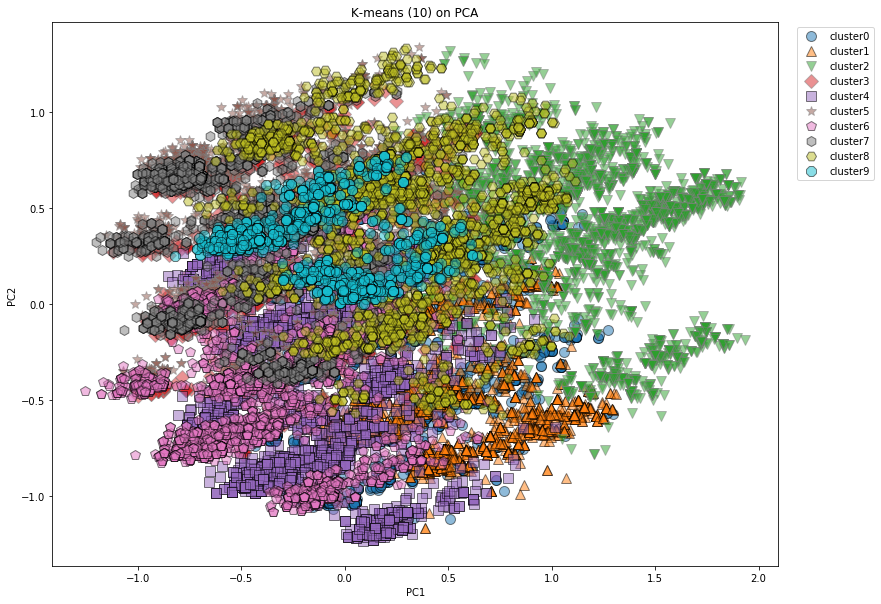

In [47]:
!pip install mglearn
import mglearn

#Plot k-means 10 clusters on PCA
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(pca_sample[:,0], pca_sample[:,1], kmeans10.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (10) on PCA")
plt.show

# Apply KMeans with k=20

In [80]:
k = 20
kmeans20 = KMeans(n_clusters=k).fit(recipes_filtered_df)

In [82]:
print("Top terms per cluster:")
order_centroidsK20 = kmeans20.cluster_centers_.argsort()[:, ::-1]
termsK20 = top_ing_clean_l
for i in range(k):
    top_wordsK20 = [termsK20[ind] for ind in order_centroidsK20[i, :30]]
    print("\nCluster {}: {}".format(i, ', '.join(top_wordsK20)))

Top terms per cluster:

Cluster 0: chicken, carrot, milk, fish, chili, cilantro, water, basil, bean, pepper, cheese, oregano, oil, wine, tomato, ginger, thyme, onion, flour, rice, broth, parsley, bell pepper, sauce, cream, garlic, butter, salt, eggs, sugar

Cluster 1: ginger, wine, chili, carrot, cilantro, garlic, parsley, cream, sauce, milk, basil, broth, bell pepper, salt, water, tomato, chicken, thyme, oil, fish, vinegar, rice, cinnamon, herbs, oregano, cheese, bean, onion, flour, sugar

Cluster 2: basil, chili, cilantro, water, ginger, chicken, bell pepper, carrot, cream, broth, tomato, fish, vinegar, onion, bean, flour, pepper, oil, wine, oregano, garlic, rice, thyme, butter, vegetables, eggs, sauce, herbs, parsley, salt

Cluster 3: chili, bell pepper, milk, pepper, butter, chicken, cream, cilantro, rice, water, flour, tomato, fish, garlic, basil, wine, oil, ginger, carrot, onion, broth, cheese, oregano, vinegar, eggs, bean, thyme, herbs, vegetables, juice

Cluster 4: bell pepper,

<function matplotlib.pyplot.show(*args, **kw)>

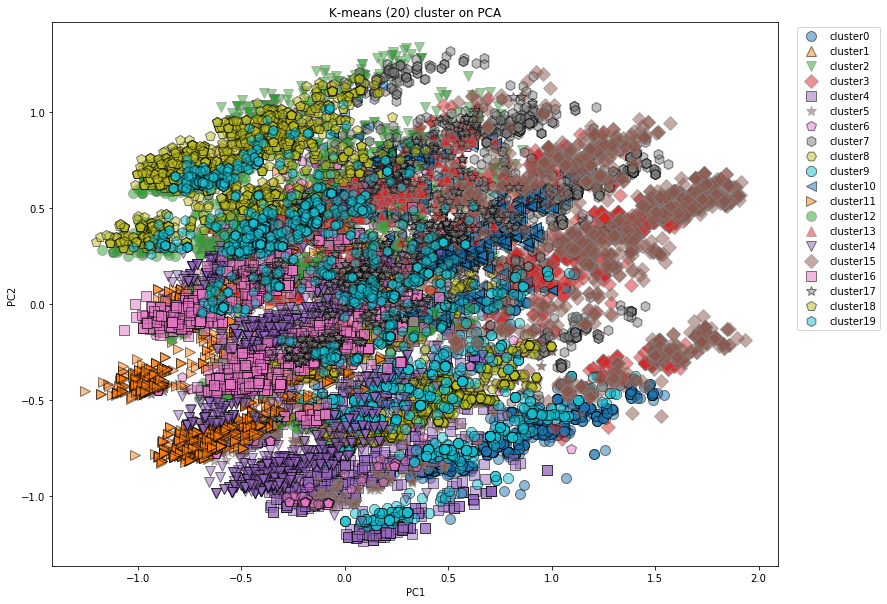

In [50]:
#Plot k-means 50 clusters on PCA
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(pca_sample[:,0], pca_sample[:,1], kmeans50.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10',
       'cluster11', 'cluster12', 'cluster13', 'cluster14', 'cluster15',
       'cluster16', 'cluster17', 'cluster18', 'cluster19', 'cluster20'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (20) cluster on PCA")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

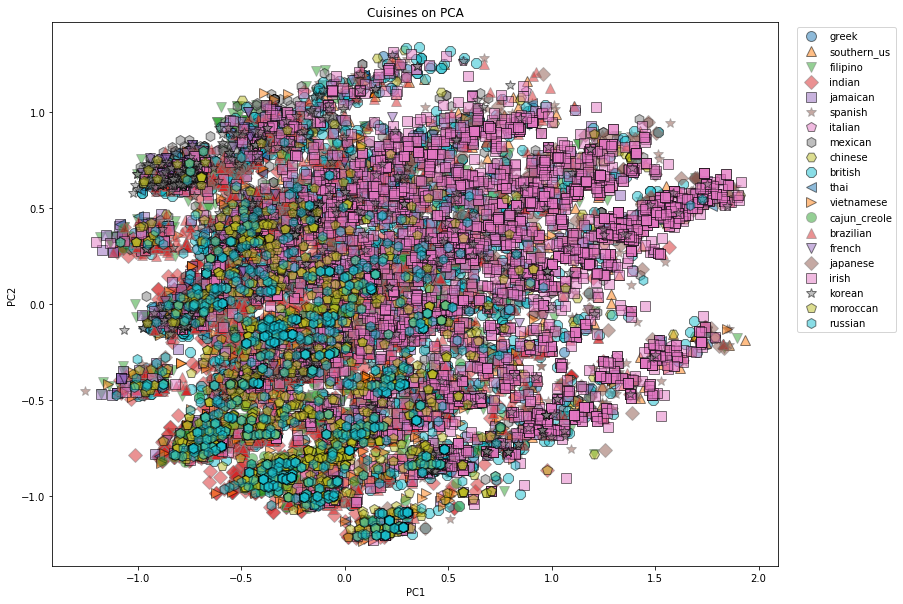

In [51]:
#Plot cuisines on PCA
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(pca_sample[:,0], pca_sample[:,1], recipes.cuisine, alpha = 0.5)
plt.legend(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cuisines on PCA")
plt.show

# Create Market-Basket Matrix

In [52]:
market_basket_df = []

for i in df_groceries_clean["common_ingredients"]:
    bin_array = []
    for j in common_items:
        if j in i:
            bin_array.append(1)
        else:
            bin_array.append(0)
    market_basket_df.append(bin_array)
    
market_basket_df = pd.DataFrame(market_basket_df, columns=common_items)
market_basket_df

,syrup,wine,eggs,meat,milk,margarine,fruits,rum,vegetables,rice,...,soda,beer,bread,pork,sugar,herbs,vinegar,chocolate,fish,honey
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8974,0,1,0,1,1,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
8975,0,0,1,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
8976,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [83]:
predict = kmeans20.predict(market_basket_df)

In [84]:
df_groceries_clean["cluster_id"] = predict

In [85]:
df_groceries_clean

,items,items_filtered,items_filtered_clean,items_stopwords2,items_more_filtered,common_ingredients,cluster_id
0,"[citrus fruit, semi-finished bread, margarine,...","[citrus fruit, semi-finished bread, margarine,...","[fruits, semi-finished bread, margarine, ready...","[fruits, bread, margarine, ready soups]","[fruits, bread, margarine, soup]","[fruits, bread, margarine]",12
1,"[tropical fruit, yogurt, coffee]","[tropical fruit, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt, coffee]","[fruits, yogurt]",12
2,[whole milk],[whole milk],[whole milk],[milk],[milk],[milk],6
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[pip fruit, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat spreads]","[fruits, yogurt, cheese, meat]","[fruits, yogurt, cheese, meat]",4
4,"[other vegetables, whole milk, condensed milk,...","[other vegetables, whole milk, milk, long life...","[vegetables, whole milk, milk, long life baker...","[vegetables, milk, milk, long life bakery prod...","[vegetables, milk, milk, long life bakery prod...","[vegetables, milk, milk]",6
...,...,...,...,...,...,...,...
9829,"[tropical fruit, other vegetables, domestic eg...","[tropical fruit, other vegetables, domestic eg...","[fruits, vegetables, domestic eggs, zwieback, ...","[fruits, vegetables, eggs, zwieback, sauce, so...","[fruits, vegetables, eggs, zwieback, sauce, so...","[fruits, vegetables, eggs, sauce, soda]",19
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, hamburger meat, citrus ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herb, chicken, beef, hamburger meat, fruits, ...","[herbs, chicken, beef, meat, fruits, vegetable...","[herbs, chicken, beef, meat, fruits, vegetable...",18
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, citrus fruit, other vegetables, butt...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...","[chicken, fruits, vegetables, butter, yogurt, ...",14
9833,"[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]","[bread, water, soda, beer]","[bread, water, soda, beer]",11


In [86]:
final_df = df_groceries_clean[["items","common_ingredients", "cluster_id"]]

In [87]:
final_df

,items,common_ingredients,cluster_id
0,"[citrus fruit, semi-finished bread, margarine,...","[fruits, bread, margarine]",12
1,"[tropical fruit, yogurt, coffee]","[fruits, yogurt]",12
2,[whole milk],[milk],6
3,"[pip fruit, yogurt, cream cheese, meat spreads]","[fruits, yogurt, cheese, meat]",4
4,"[other vegetables, whole milk, condensed milk,...","[vegetables, milk, milk]",6
...,...,...,...
9829,"[tropical fruit, other vegetables, domestic eg...","[fruits, vegetables, eggs, sauce, soda]",19
9830,"[sausage, chicken, beef, hamburger meat, citru...","[herbs, chicken, beef, meat, fruits, vegetable...",18
9832,"[chicken, citrus fruit, other vegetables, butt...","[chicken, fruits, vegetables, butter, yogurt, ...",14
9833,"[semi-finished bread, bottled water, soda, bot...","[bread, water, soda, beer]",11


In [88]:
print("Top terms per cluster:")
order_centroidsK20 = kmeans20.cluster_centers_.argsort()[:, ::-1]
termsK20 = top_ing_clean_l
for i in range(k):
    top_wordsK20 = [termsK20[ind] for ind in order_centroidsK20[i, :30]]
    print("\nCluster {}: {}".format(i, ', '.join(top_wordsK20)))

Top terms per cluster:

Cluster 0: chicken, carrot, milk, fish, chili, cilantro, water, basil, bean, pepper, cheese, oregano, oil, wine, tomato, ginger, thyme, onion, flour, rice, broth, parsley, bell pepper, sauce, cream, garlic, butter, salt, eggs, sugar

Cluster 1: ginger, wine, chili, carrot, cilantro, garlic, parsley, cream, sauce, milk, basil, broth, bell pepper, salt, water, tomato, chicken, thyme, oil, fish, vinegar, rice, cinnamon, herbs, oregano, cheese, bean, onion, flour, sugar

Cluster 2: basil, chili, cilantro, water, ginger, chicken, bell pepper, carrot, cream, broth, tomato, fish, vinegar, onion, bean, flour, pepper, oil, wine, oregano, garlic, rice, thyme, butter, vegetables, eggs, sauce, herbs, parsley, salt

Cluster 3: chili, bell pepper, milk, pepper, butter, chicken, cream, cilantro, rice, water, flour, tomato, fish, garlic, basil, wine, oil, ginger, carrot, onion, broth, cheese, oregano, vinegar, eggs, bean, thyme, herbs, vegetables, juice

Cluster 4: bell pepper,

# TO DO
* Ordinare la parte di data cleaning 
* k da provare 3 5 7 10 15 20 andiamo a vedere quelli che hanno piú senso
* Elbow method da 3 a 20
* Rilanciare tutto con 1/3 1/2 1 2 4 e fare il timing di ogni fase Trannne gli elbow e le varie prove. 
* grafico di come scala con l'aumentare dei mega e del numero di righe